In [ ]:
!pip install keras==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#@title fetch dataset
X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_train_selected.csv")
X_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_valid_selected.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_test_selected.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/combinedcsv.csv")
y = df["malicious"]

In [ ]:
y_train, y_temp = train_test_split(y, test_size=0.3, random_state=42)
y_val, y_test = train_test_split(y_temp, test_size=1/3, random_state=42)

In [ ]:
#@title creating ANN
def create_model(optimizer='adam', activation='relu', neurons=64, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
#@title Create the KerasClassifier
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1)

<ipython-input-6-aec56f5c9ca3>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1)


In [ ]:
#@title GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'neurons': [16],
    'hidden_layers': [1],
    'activation': ['relu'],
    'optimizer': ['adam'],
    'batch_size': [64, 128, 256],
}

# Use StratifiedKFold for classification tasks
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=3, n_jobs=1)

# Fit the model with GridSearchCV
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_result.best_params_)

# Get the best model
best_model = grid_result.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/10
515/515 [==============================] - 2s 3ms/step - loss: 0.3467 - accuracy: 0.8840
Epoch 2/10
515/515 [==============================] - 1s 3ms/step - loss: 0.1918 - accuracy: 0.9339
Epoch 3/10
515/515 [==============================] - 1s 3ms/step - loss: 0.1713 - accuracy: 0.9391
Epoch 4/10
515/515 [==============================] - 3s 5ms/step - loss: 0.1601 - accuracy: 0.9426
Epoch 5/10
515/515 [==============================] - 2s 4ms/step - loss: 0.1481 - accuracy: 0.9455
Epoch 6/10
515/515 [==============================] - 1s 2ms/step - loss: 0.1412 - accuracy: 0.9483
Epoch 7/10
515/515 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9520
Epoch 8/10
515/515 [==============================] - 1s 2ms/step - loss: 0.1277 - accuracy: 0.9540
Epoch 9/10
515/515 [==============================] - 1s 2ms/step - loss: 0.1219 - accuracy: 0.9560
Epoch 10/10
515/515 [====================

In [ ]:
#@title Making and fitting ANN

ann = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=500, batch_size=64, hidden_layers=1, neurons=256, optimizer='adam', verbose=1, validation_split=0.3)

history = ann.fit(X_train, y_train)

<ipython-input-30-2b0a52141a80>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=500, batch_size=64, hidden_layers=1, neurons=256, optimizer='adam', verbose=1, validation_split=0.3)


Epoch 1/500
541/541 [==============================] - 6s 7ms/step - loss: 0.2639 - accuracy: 0.9140 - val_loss: 0.2083 - val_accuracy: 0.9289
Epoch 2/500
541/541 [==============================] - 3s 6ms/step - loss: 0.1746 - accuracy: 0.9428 - val_loss: 0.1936 - val_accuracy: 0.9370
Epoch 3/500
541/541 [==============================] - 3s 6ms/step - loss: 0.1460 - accuracy: 0.9509 - val_loss: 0.1980 - val_accuracy: 0.9406
Epoch 4/500
541/541 [==============================] - 3s 6ms/step - loss: 0.1313 - accuracy: 0.9570 - val_loss: 0.1791 - val_accuracy: 0.9480
Epoch 5/500
541/541 [==============================] - 5s 8ms/step - loss: 0.1219 - accuracy: 0.9627 - val_loss: 0.1860 - val_accuracy: 0.9502
Epoch 6/500
541/541 [==============================] - 4s 8ms/step - loss: 0.1116 - accuracy: 0.9659 - val_loss: 0.1828 - val_accuracy: 0.9514
Epoch 7/500
541/541 [==============================] - 4s 7ms/step - loss: 0.1058 - accuracy: 0.9698 - val_loss: 0.1870 - val_accuracy: 0.9512

In [ ]:
import pickle

f1 = open("/content/drive/MyDrive/Colab Notebooks/ANN.pickle","wb")
f2 = open("/content/drive/MyDrive/Colab Notebooks/ANN.history","wb")
pickle.dump(ann, f1)
pickle.dump(history, f2)
f1.close()
f2.close()

In [ ]:
import pickle

f1 = open("/content/drive/MyDrive/Colab Notebooks/ANN.pickle","rb")
f2 = open("/content/drive/MyDrive/Colab Notebooks/ANN.history","rb")
ann = pickle.load(f1)
history = pickle.load(f2)
f1.close()
f2.close()

In [ ]:
#dir(ann.score)
print(ann.score(X_train, y_train))

773/773 [==============================] - 4s 4ms/step - loss: 0.2132 - accuracy: 0.9849
0.9849033951759338


221/221 [==============================] - 0s 2ms/step
Confusion Matrix - Training Set:
[[21884   389]
 [  357 26785]]

Confusion Matrix - Validation Set:
[[6109  335]
 [ 292 7382]]

Confusion Matrix - Test Set:
[[3021  136]
 [ 129 3774]]

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22273
           1       0.99      0.99      0.99     27142

    accuracy                           0.98     49415
   macro avg       0.98      0.98      0.98     49415
weighted avg       0.98      0.98      0.98     49415


Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6444
           1       0.96      0.96      0.96      7674

    accuracy                           0.96     14118
   macro avg       0.96      0.95      0.96     14118
weighted avg       0.96      0.96      0.96     14118


Classification Report - Te

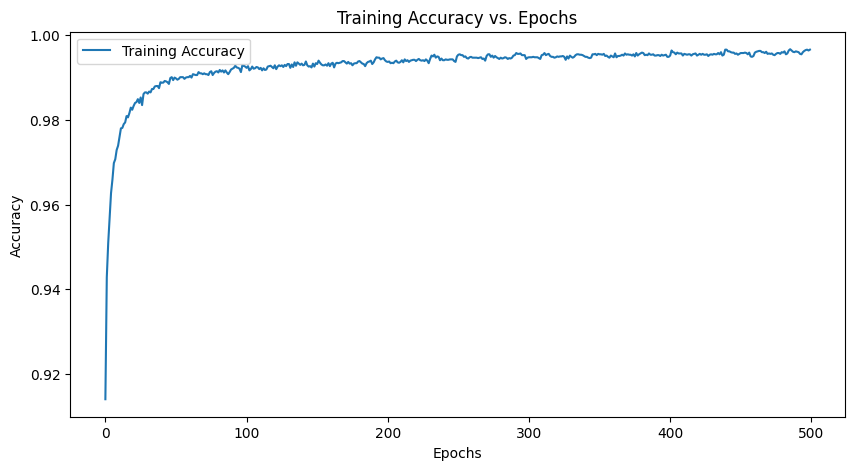

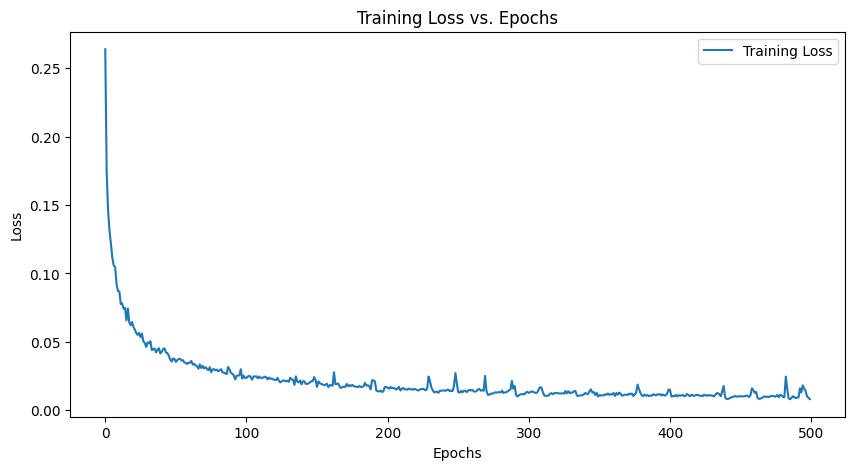

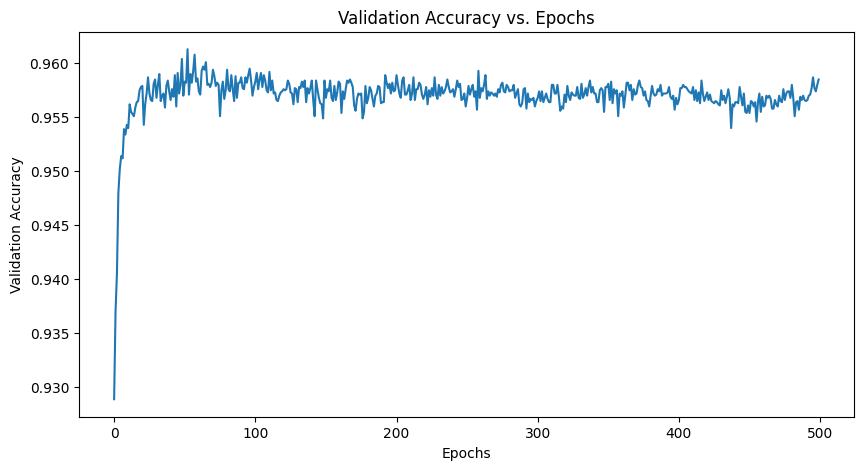

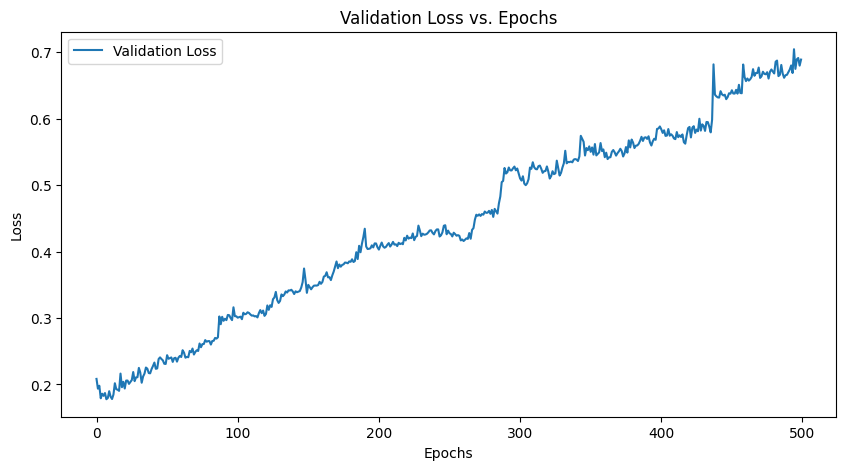

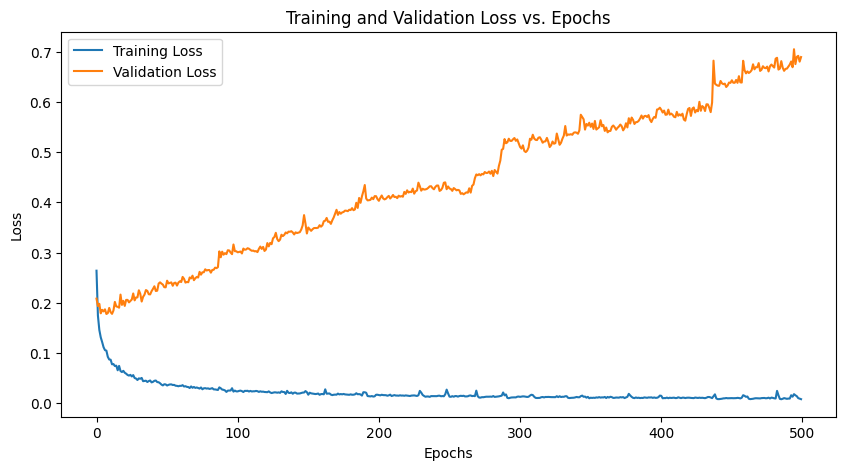

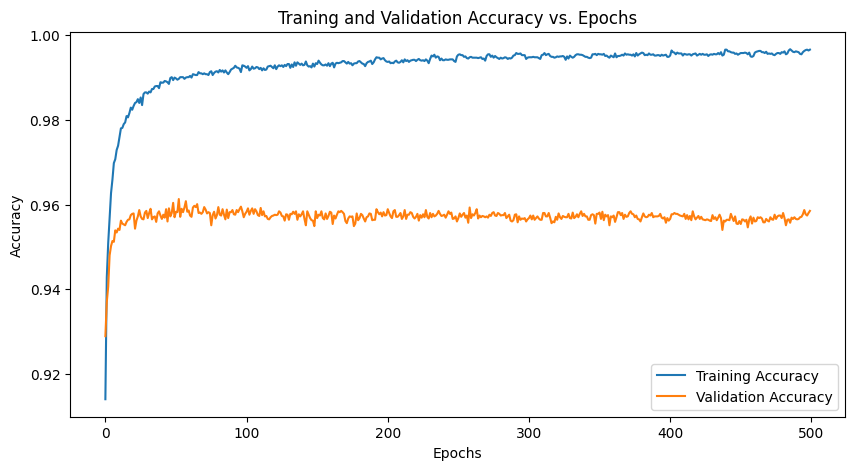

In [ ]:
#@title Metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.interpolate import make_interp_spline

# Predictions on training and validation sets
y_train_pred = ann.predict(X_train)
y_val_pred = ann.predict(X_val)
y_test_pred = ann.predict(X_test)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


print("Confusion Matrix - Training Set:")
print(conf_matrix_train)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

# Classification Report
class_report_train = classification_report(y_train, y_train_pred)
class_report_val = classification_report(y_val, y_val_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("\nClassification Report - Training Set:")
print(class_report_train)
print("\nClassification Report - Validation Set:")
print(class_report_val)
print("\nClassification Report - Test Set:")
print(class_report_test)

# Training Accuracy and Validation Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nTraining Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot Training Accuracy and Validation Accuracy vs Epochs
with open("/content/drive/MyDrive/Colab Notebooks/training_acc","r") as f:
  train_scores = f.read()
train_scores = train_scores.split("\n")
train_scores = train_scores[:-1]
train_scores = [float(i) for i in train_scores]

plt.figure(figsize=(10, 5))
plt.plot(train_scores, label='Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training Loss  vs Epochs
with open("/content/drive/MyDrive/Colab Notebooks/training_loss","r") as f:
  train_loss = f.read()
train_loss = train_loss.split("\n")
train_loss = train_loss[:-1]
train_loss = [float(i) for i in train_loss]

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Validation Accuracy vs Epochs
with open("/content/drive/MyDrive/Colab Notebooks/val_accuracy","r") as f:
  val_scores = f.read()
val_scores = val_scores.split("\n")
val_scores = val_scores[:-1]
val_scores = [float(i) for i in val_scores]

plt.figure(figsize=(10, 5))
plt.plot(val_scores, label='Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

# Plot Validation Loss  vs Epochs
with open("/content/drive/MyDrive/Colab Notebooks/val_loss","r") as f:
  val_loss = f.read()
val_loss = val_loss.split("\n")
val_loss = val_loss[:-1]
val_loss = [float(i) for i in val_loss]

plt.figure(figsize=(10, 5))
plt.plot(val_loss, label='Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training Loss and Validation Loss vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training Accuracy and Validation Accurcy vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(train_scores, label='Training Accuracy')
plt.plot(val_scores, label='Validation Accuracy')
plt.title('Traning and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()